In [1]:
import pandas as pd
import os

from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
df = pd.read_csv('list_attribute.txt', sep='\s+', skiprows=1)

file_images = os.listdir('images/')
df_filtered = df[df.index.isin(file_images)]

df_filtered.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.0000
mean,-0.785200,-0.46920,0.031200,-0.591200,-0.948800,-0.706000,-0.542800,-0.548800,-0.532800,-0.717600,...,-0.887600,-0.056000,-0.588000,-0.388400,-0.628400,-0.903200,-0.060400,-0.75800,-0.858800,0.5552
std,0.619304,0.88318,0.999613,0.806606,0.315909,0.708283,0.839946,0.836037,0.846326,0.696525,...,0.460661,0.998531,0.808942,0.921583,0.777968,0.429263,0.998274,0.65232,0.512362,0.8318
min,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.0000
25%,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,1.0000
50%,-1.000000,-1.00000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,1.0000
75%,-1.000000,1.00000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.0000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.0000


In [15]:
df_filtered.reset_index(inplace=True)
df_compiled = df_filtered[['index', 'Male']]
df_compiled

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
3,000166.jpg,1
4,000198.jpg,-1
...,...,...
4995,202320.jpg,-1
4996,202340.jpg,-1
4997,202347.jpg,-1
4998,202357.jpg,-1


In [16]:
df_compiled.loc[df_compiled['Male'] < 0, 'Male'] = 0
df_compiled

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
3,000166.jpg,1
4,000198.jpg,0
...,...,...
4995,202320.jpg,0
4996,202340.jpg,0
4997,202347.jpg,0
4998,202357.jpg,0


In [17]:
df_compiled.dtypes

index    object
Male      int64
dtype: object

In [18]:
df_compiled = df_compiled.astype({'Male': 'string'})
df_compiled.dtypes

index            object
Male     string[python]
dtype: object

In [19]:
df_compiled.loc[df_compiled['Male'] == '1', ['Male']] = 'Male'
df_compiled.loc[df_compiled['Male'] == '0', ['Male']] = 'Female'
df_compiled

,index,Male
0,000051.jpg,Male
1,000052.jpg,Male
2,000065.jpg,Male
3,000166.jpg,Male
4,000198.jpg,Female
...,...,...
4995,202320.jpg,Female
4996,202340.jpg,Female
4997,202347.jpg,Female
4998,202357.jpg,Female


In [20]:
train_files = os.listdir('train/')
test_files = os.listdir('test/')
df_train = df_compiled[df_compiled['index'].isin(train_files)]
df_test = df_compiled[df_compiled['index'].isin(test_files)]

In [21]:
df_train

,index,Male
0,000051.jpg,Male
1,000052.jpg,Male
3,000166.jpg,Male
4,000198.jpg,Female
6,000240.jpg,Female
...,...,...
4991,202045.jpg,Female
4992,202200.jpg,Female
4993,202253.jpg,Female
4996,202340.jpg,Female


In [23]:
df_test

,index,Male
2,000065.jpg,Male
5,000201.jpg,Female
15,000545.jpg,Male
17,000572.jpg,Male
19,000653.jpg,Female
...,...,...
4990,201989.jpg,Female
4994,202276.jpg,Male
4995,202320.jpg,Female
4997,202347.jpg,Female


In [24]:
IMG_SIZE = (218, 178)
BATCH_SIZE = 30
EPOCH_COUNT = 100

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [26]:
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    './train',
    x_col='index',
    y_col='Male',
    class_mode='binary',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 3500 validated image filenames belonging to 2 classes.


In [27]:
# Val Gen
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    df_test,
    './test',
    x_col='index',
    y_col='Male',
    class_mode='binary',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 1500 validated image filenames belonging to 2 classes.


In [28]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape= IMG_SIZE + (3,))
base_model.trainable = False
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 218, 178, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 218, 178, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 218, 178, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 109, 89, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 109, 89, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 109, 89, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 54, 44, 128)       0     

In [29]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 6, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 15360)             0         
                                                                 
 dense (Dense)               (None, 256)               3932416   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                5

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.001)
# Define a ModelCheckpoint callback to save the model weights during training
checkpoint_callback = ModelCheckpoint(filepath='Dataset/vgg_weights.h5',
                                      save_best_only=True,
                                      save_weights_only=False)

callbacks = [checkpoint_callback, earlystop, learning_rate_reduction]

In [33]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    validation_steps=len(df_test)//BATCH_SIZE,
                    steps_per_epoch=len(df_train)//BATCH_SIZE,
                    epochs=EPOCH_COUNT,
                    verbose = 1,
                    callbacks=callbacks
                    )

Epoch 1/100
116/116 [==============================] - 289s 2s/step - loss: 0.4247 - accuracy: 0.8046 - val_loss: 0.2547 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 2/100


D:\Programming\Python\AI\Project-01-AI-For-Indonesia\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


116/116 [==============================] - 296s 3s/step - loss: 0.2813 - accuracy: 0.8841 - val_loss: 0.2431 - val_accuracy: 0.9027 - lr: 0.0010
Epoch 3/100
116/116 [==============================] - 300s 3s/step - loss: 0.2713 - accuracy: 0.8862 - val_loss: 0.2410 - val_accuracy: 0.8987 - lr: 0.0010
Epoch 4/100
116/116 [==============================] - 286s 2s/step - loss: 0.2482 - accuracy: 0.8934 - val_loss: 0.2732 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 5/100
116/116 [==============================] - 286s 2s/step - loss: 0.2518 - accuracy: 0.8963 - val_loss: 0.2197 - val_accuracy: 0.9160 - lr: 0.0010
Epoch 6/100
116/116 [==============================] - 286s 2s/step - loss: 0.2259 - accuracy: 0.9061 - val_loss: 0.2102 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 7/100
116/116 [==============================] - 286s 2s/step - loss: 0.2211 - accuracy: 0.9141 - val_loss: 0.2905 - val_accuracy: 0.8827 - lr: 0.0010
Epoch 8/100
116/116 [==============================] - 286s 2s/step - 

In [34]:
model.save('model.h5')

In [ ]:
import tensorflow as tf

# import trained model if needed.
model = tf.keras.models.load_model('model.h5')

In [94]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from keras.applications.mobilenet_v2 import preprocess_input

def predict_image(url):
    im = Image.open(requests.get(url, stream=True).raw)
    resized_im = im.resize((178, 218))
    
    img_array = image.img_to_array(resized_im)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    predict = model.predict(img_array)

    female_prob = predict[0][0]
    male_prob = predict[0][1]

    if male_prob > female_prob:
        result = "Male"
    else:
        result = "Female"

    plt.imshow(im)
    plt.axis('off')
    plt.title('Test Image')
    
    plt.show()
    print(f"Prediction[Male:{male_prob}, Female:{female_prob}")
    print(f"Model predicts: {result}")

1/1 [==============================] - 0s 88ms/step


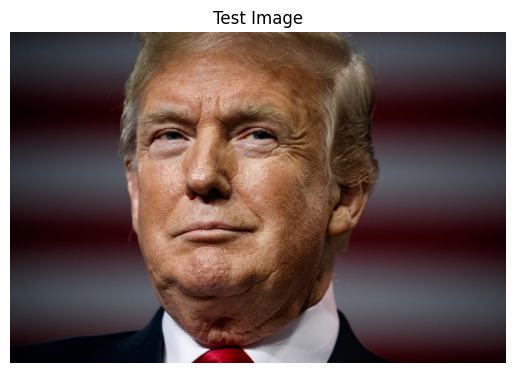

Prediction[Male:0.4033058285713196, Female:0.10360640287399292
Model predicts: Male
1/1 [==============================] - 0s 78ms/step


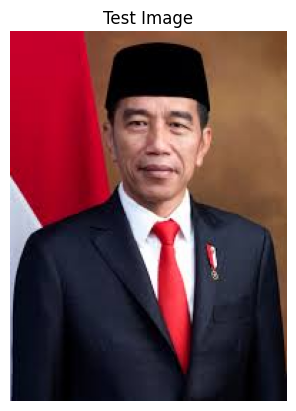

Prediction[Male:0.4144497215747833, Female:0.04520050808787346
Model predicts: Male
1/1 [==============================] - 0s 72ms/step


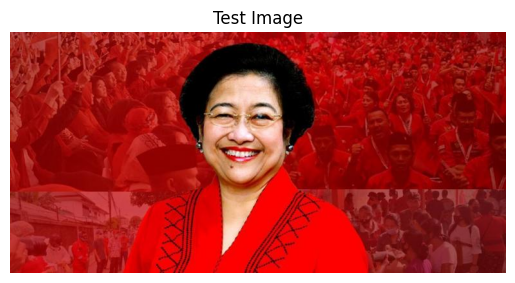

Prediction[Male:0.06903807073831558, Female:0.17774589359760284
Model predicts: Female
1/1 [==============================] - 0s 114ms/step


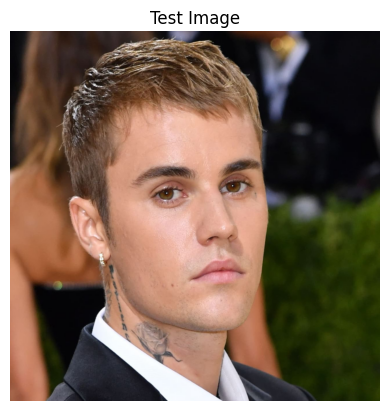

Prediction[Male:0.36776232719421387, Female:0.04886944591999054
Model predicts: Male
1/1 [==============================] - 0s 76ms/step


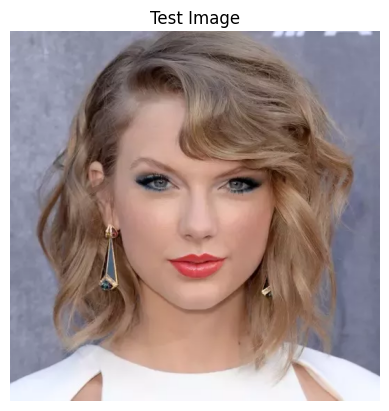

Prediction[Male:0.001984886359423399, Female:0.3096146285533905
Model predicts: Female


In [97]:
from PIL import Image
import requests

urls = ['https://media.newyorker.com/photos/5b74b2fb4545774bcd21b96e/master/pass/Cassidy-TrumpGOPHold.jpg',
      'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJ4Ef3V9AhuK7JDSifZ_mmPilxTsLpspDOTlJF16CXvQ&s',
      'https://rm.id/images/berita/med/ucapin-selamat-lebaran-megawati-ramadan-menempa-kita-jadi-pribadi-lebih-kuat-tahan-hadapi-penderitaan_123077.jpeg',
      'https://images.mktw.net/im-562122?width=1280&size=1',
       'https://qph.cf2.quoracdn.net/main-qimg-f1dad107aa4fb1b5f5a81067df3fa6ec.webp',]

for url in urls:
    predict_image(url)